In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc
from sqlalchemy.sql import label

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=True)
this_conn = engine.connect()

2021-07-23 20:42:36,269 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-07-23 20:42:36,270 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:36,272 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-07-23 20:42:36,273 INFO sqlalchemy.engine.base.Engine ()


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

2021-07-23 20:42:37,892 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-07-23 20:42:37,895 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:37,898 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("measurement")
2021-07-23 20:42:37,899 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:37,902 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-07-23 20:42:37,903 INFO sqlalchemy.engine.base.Engine ('measurement',)
2021-07-23 20:42:37,908 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("measurement")
2021-07-23 20:42:37,909 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:37,910 INFO sqlalchemy.engine.base.Engine PRAGMA temp.foreign_key_list("measurement")
2021-07-23 20:42:37,911 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:37,912 INFO sqlalchemy.engine.base.Engine SELEC

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
### Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Save references to each table
### Collect the names of tables within the database
inspector.get_table_names()

2021-07-23 20:42:42,804 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-07-23 20:42:42,807 INFO sqlalchemy.engine.base.Engine ()


['measurement', 'station']

In [9]:
# get columns for measurement table
meas_cols = inspector.get_columns('measurement')
for c in meas_cols:
    print(c['name'], c['type'])

2021-07-23 20:42:44,339 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("measurement")
2021-07-23 20:42:44,340 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# get columns for station table
stat_cols = inspector.get_columns('station')
for c in stat_cols:
    print(c['name'], c['type'])

2021-07-23 20:42:45,770 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("station")
2021-07-23 20:42:45,772 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# not sure I need these, but doing it because it was in very first activity Query All Records in the Database
measurement_data = engine.execute("SELECT * FROM measurement")
measurement_df = pd.read_sql("SELECT * FROM measurement", this_conn)

measurement_df.head()

2021-07-23 20:42:47,169 INFO sqlalchemy.engine.base.Engine SELECT * FROM measurement
2021-07-23 20:42:47,170 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:47,174 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM measurement")
2021-07-23 20:42:47,175 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:47,179 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM measurement")
2021-07-23 20:42:47,180 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:47,182 INFO sqlalchemy.engine.base.Engine SELECT * FROM measurement
2021-07-23 20:42:47,184 INFO sqlalchemy.engine.base.Engine ()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# not sure I need these, but doing it because it was in very first activity Query All Records in the Database
station_data = engine.execute("SELECT * FROM station")
station_df = pd.read_sql("SELECT * FROM station", this_conn)

station_df

2021-07-23 20:42:49,628 INFO sqlalchemy.engine.base.Engine SELECT * FROM station
2021-07-23 20:42:49,633 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:49,636 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM station")
2021-07-23 20:42:49,637 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:49,639 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM station")
2021-07-23 20:42:49,640 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 20:42:49,643 INFO sqlalchemy.engine.base.Engine SELECT * FROM station
2021-07-23 20:42:49,644 INFO sqlalchemy.engine.base.Engine ()


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
### Assign classes to variables 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# find most recent date in the database
last_date = session.query(func.max(Measurement.date)).first()
print(last_date)

2021-07-23 20:42:59,785 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-07-23 20:42:59,788 INFO sqlalchemy.engine.base.Engine SELECT max(measurement.date) AS max_1 
FROM measurement
 LIMIT ? OFFSET ?
2021-07-23 20:42:59,789 INFO sqlalchemy.engine.base.Engine (1, 0)
('2017-08-23',)


## Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [16]:
# Starting from the most recent data point in the database. 
# The date that was pulled was a tuple & I saw online to use a marker to pull just the date 
# end_date = dt.date(last_date[0])  # The date is 2017-08-23; *the code DOES WORK, but I hard-coded to be sure*
end_hand = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
# start_date = end_date - dt.timedelta(days=365)  # THIS date should be 2016-08-24; hadn't gotten to work yet
start_hand = dt.date(2016, 8, 24) 
print(f'start date is {start_hand} & end date is {end_hand}')

start date is 2016-08-24 & end date is 2017-08-23


In [17]:
# V0 produces list of tuples; has appropriate dates, but need to collapse so there is only 1 pair per date
precip_output0 = session.query(Measurement.id, Measurement.date, Measurement.prcp).\
    filter(Measurement.date >=start_hand).all()
 

2021-07-23 20:43:32,225 INFO sqlalchemy.engine.base.Engine SELECT measurement.id AS measurement_id, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2021-07-23 20:43:32,231 INFO sqlalchemy.engine.base.Engine ('2016-08-24',)


In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
precipitation_df = pd.DataFrame(precip_output0, columns=['id', 'date', 'precip']).set_index('id')
precipitation_df.dtypes

date       object
precip    float64
dtype: object

In [21]:
# Sort the dataframe by date, CONVERT date type to date, THEN set index on date
precipitation_df['date']=pd.to_datetime(precipitation_df['date'])
precipitation_df = precipitation_df.sort_values(by='date').set_index('date')
precipitation_df

,precip
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


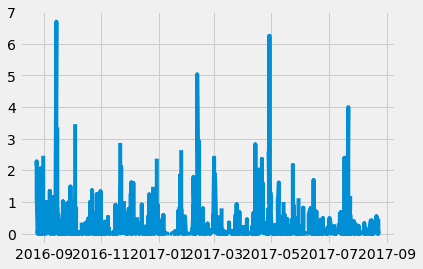

In [22]:
## Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precipitation_df)
#plt.savefig(precip.png) *** need to fix this so it saves, currently gives error that it's not defined

In [23]:
## Use Pandas to calcualte the summary statistics for the precipitation data
## ** I think this is different because I set my >= to 8-24-2016 on my filter 
# because that's the date to give the most recent 365 days of data as the last date is 8-23-2017
precip_summary_df = precipitation_df.describe()
precip_summary_df

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(distinct(Station.name))).one()
total_stations
# this seems to be setting up a tuple??

2021-07-23 20:43:45,132 INFO sqlalchemy.engine.base.Engine SELECT count(DISTINCT station.name) AS count_1 
FROM station
2021-07-23 20:43:45,135 INFO sqlalchemy.engine.base.Engine ()


(9)

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

2021-07-23 20:43:46,508 INFO sqlalchemy.engine.base.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2021-07-23 20:43:46,511 INFO sqlalchemy.engine.base.Engine ()


In [27]:
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# ** can't get it to work when I try to use the variable of parameters
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# sel_stats = 'Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)'
most_active_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all() #.\
    # group_by(Measurement.station)

2021-07-23 20:44:04,653 INFO sqlalchemy.engine.base.Engine SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
2021-07-23 20:44:04,655 INFO sqlalchemy.engine.base.Engine ('USC00519281',)


In [32]:
most_active_stats

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >=start_hand, Measurement.station == "USC00519281").\
    order_by(Measurement.tobs).all()

2021-07-23 20:44:08,467 INFO sqlalchemy.engine.base.Engine SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.station = ? ORDER BY measurement.tobs
2021-07-23 20:44:08,468 INFO sqlalchemy.engine.base.Engine ('2016-08-24', 'USC00519281')


In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
activeYR_df = pd.DataFrame(active_year, columns=['date', 'temp']).set_index('date')
activeYR_df.dtypes

temp    float64
dtype: object

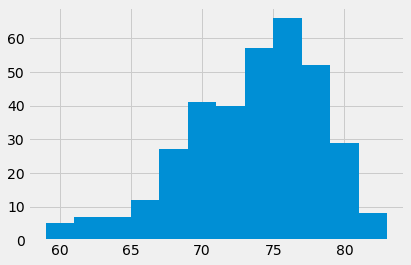

In [38]:
# histogram
n_bins = 12
x = activeYR_df

fig = plt.hist(x, bins=12)
plt.show()

# Close session

In [39]:
# Close Session
session.close()

2021-07-23 20:44:19,022 INFO sqlalchemy.engine.base.Engine ROLLBACK
